In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [40]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [41]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [42]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [43]:
le = LabelEncoder()
le.fit(df['fuel_type'].unique().tolist())
encoded_labels = le.transform(df['fuel_type'])
encoded_labels
df.insert(5, 'fuel_type_encoded', encoded_labels)
df = df.drop('fuel_type', axis=1)

le.fit(df_test['fuel_type'].unique().tolist())
encoded_labels = le.transform(df_test['fuel_type'])
encoded_labels
df_test.insert(5, 'fuel_type_encoded', encoded_labels)
df_test = df_test.drop('fuel_type', axis=1)

In [44]:
df['brand'].unique().__len__()
le.fit(df['brand'].unique().tolist())
df.insert(1, 'brand_encoded', le.transform(df['brand']))

df_test['brand'].unique().__len__()
le.fit(df_test['brand'].unique().tolist())
df_test.insert(1, 'brand_encoded', le.transform(df_test['brand']))



In [45]:
df = df.drop('brand', axis=1)
df_test = df_test.drop('brand', axis=1)

In [46]:
df

,id,brand_encoded,model,model_year,milage,fuel_type_encoded,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,Cooper S Base,2007,213000,2,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,28,LS V8,2002,143250,2,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,9,Silverado 2500 LT,2002,136731,1,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,16,G90 5.0 Ultimate,2017,19500,2,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,36,Metris Base,2021,7388,2,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,8,Escalade ESV Platinum,2017,49000,2,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,36,AMG C 43 AMG C 43 4MATIC,2018,28600,2,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,36,AMG GLC 63 Base 4MATIC,2021,13650,2,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,3,S5 3.0T Prestige,2022,13895,2,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [47]:
df = df.drop('id', axis=1)
df = pd.get_dummies(df, columns = ['clean_title'])

df_test = df_test.drop('id', axis=1)
df_test = pd.get_dummies(df_test, columns = ['clean_title'])


In [48]:
df = pd.get_dummies(df, columns = ['accident'])
df_test = pd.get_dummies(df_test, columns = ['accident'])


In [49]:
df.rename(columns={'accident_At least 1 accident or damage reported': 'accidented'}, inplace=True)
df_test.rename(columns={'accident_At least 1 accident or damage reported': 'accidented'}, inplace=True)

In [50]:
df.drop(['accident_None reported', 'model', 'engine'], axis=1, inplace=True)
df_test.drop(['accident_None reported', 'model', 'engine'], axis=1, inplace=True)

In [51]:
df.rename(columns={'clean_title': 'clean_title'}, inplace=True)
df_test.rename(columns={'clean_title': 'clean_title'}, inplace=True)

- TODO: add automatic/manual transmission feature

In [52]:
df.head()
le.fit(df['transmission'].unique().tolist())
encoded_labels = le.transform(df['transmission'])
encoded_labels
df.insert(5, 'transmission_encoded', encoded_labels)
df = df.drop('transmission', axis=1)

df_test.head()
le.fit(df_test['transmission'].unique().tolist())
encoded_labels = le.transform(df_test['transmission'])
encoded_labels
df_test.insert(5, 'transmission_encoded', encoded_labels)
df_test = df_test.drop('transmission', axis=1)

In [53]:
df.head()

,brand_encoded,model_year,milage,fuel_type_encoded,transmission_encoded,ext_col,int_col,price,clean_title_Yes,accidented
0,31,2007,213000,2,38,Yellow,Gray,4200,True,False
1,28,2002,143250,2,38,Silver,Beige,4999,True,True
2,9,2002,136731,1,38,Blue,Gray,13900,True,False
3,16,2017,19500,2,49,Black,Black,45000,True,False
4,36,2021,7388,2,23,Black,Beige,97500,True,False


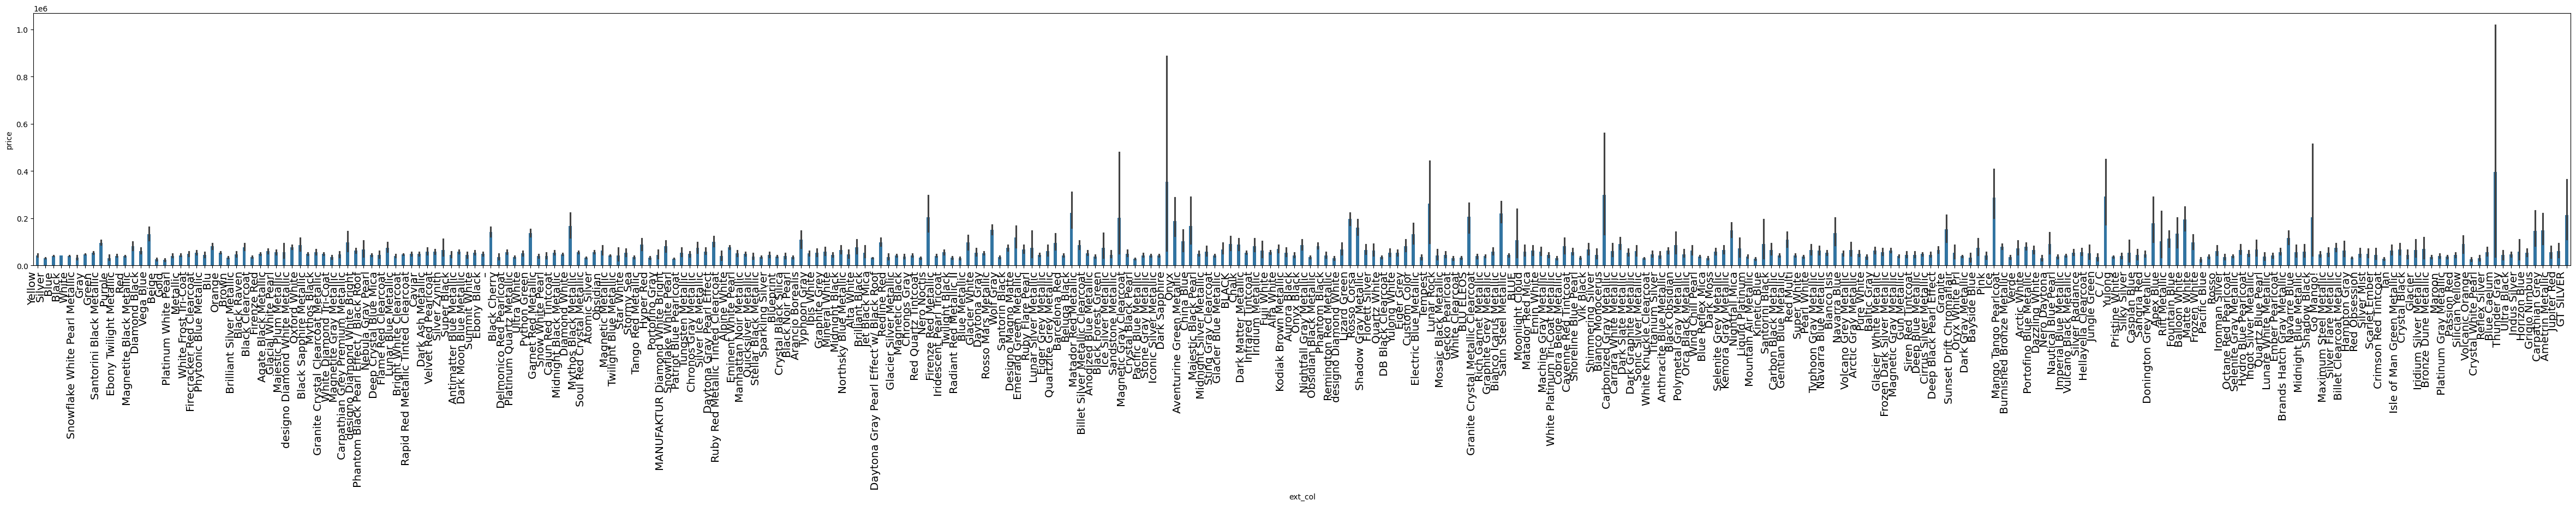

In [54]:
plt.figure(figsize=(60, 6))  # Adjust width and height as needed
sns.barplot(x='ext_col', y='price', data=df, gap=0.5)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [55]:
le.fit(df['int_col'].unique().tolist())
encoded_labels = le.transform(df['int_col'])
encoded_labels
df.insert(5, 'int_col_encoded', encoded_labels)

le.fit(df_test['int_col'].unique().tolist())
encoded_labels = le.transform(df_test['int_col'])
encoded_labels
df_test.insert(5, 'int_col_encoded', encoded_labels)


In [56]:
le.fit(df['ext_col'].unique().tolist())
encoded_labels = le.transform(df['ext_col'])
encoded_labels
df.insert(5, 'ext_col_encoded', encoded_labels)

le.fit(df_test['ext_col'].unique().tolist())
encoded_labels = le.transform(df_test['ext_col'])
encoded_labels
df_test.insert(5, 'ext_col_encoded', encoded_labels)


In [57]:
df.drop(['ext_col', 'int_col'], axis=1, inplace=True)
df_test.drop(['ext_col', 'int_col'], axis=1, inplace=True)

In [58]:
df.head()

,brand_encoded,model_year,milage,fuel_type_encoded,transmission_encoded,ext_col_encoded,int_col_encoded,price,clean_title_Yes,accidented
0,31,2007,213000,2,38,312,71,4200,True,False
1,28,2002,143250,2,38,263,10,4999,True,True
2,9,2002,136731,1,38,38,71,13900,True,False
3,16,2017,19500,2,49,29,14,45000,True,False
4,36,2021,7388,2,23,29,10,97500,True,False


In [59]:
# from pandas_profiling import ProfileReport


# ProfileReport(df)

array([[<Axes: title={'center': 'brand_encoded'}>,
        <Axes: title={'center': 'model_year'}>,
        <Axes: title={'center': 'milage'}>],
       [<Axes: title={'center': 'fuel_type_encoded'}>,
        <Axes: title={'center': 'transmission_encoded'}>,
        <Axes: title={'center': 'ext_col_encoded'}>],
       [<Axes: title={'center': 'int_col_encoded'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

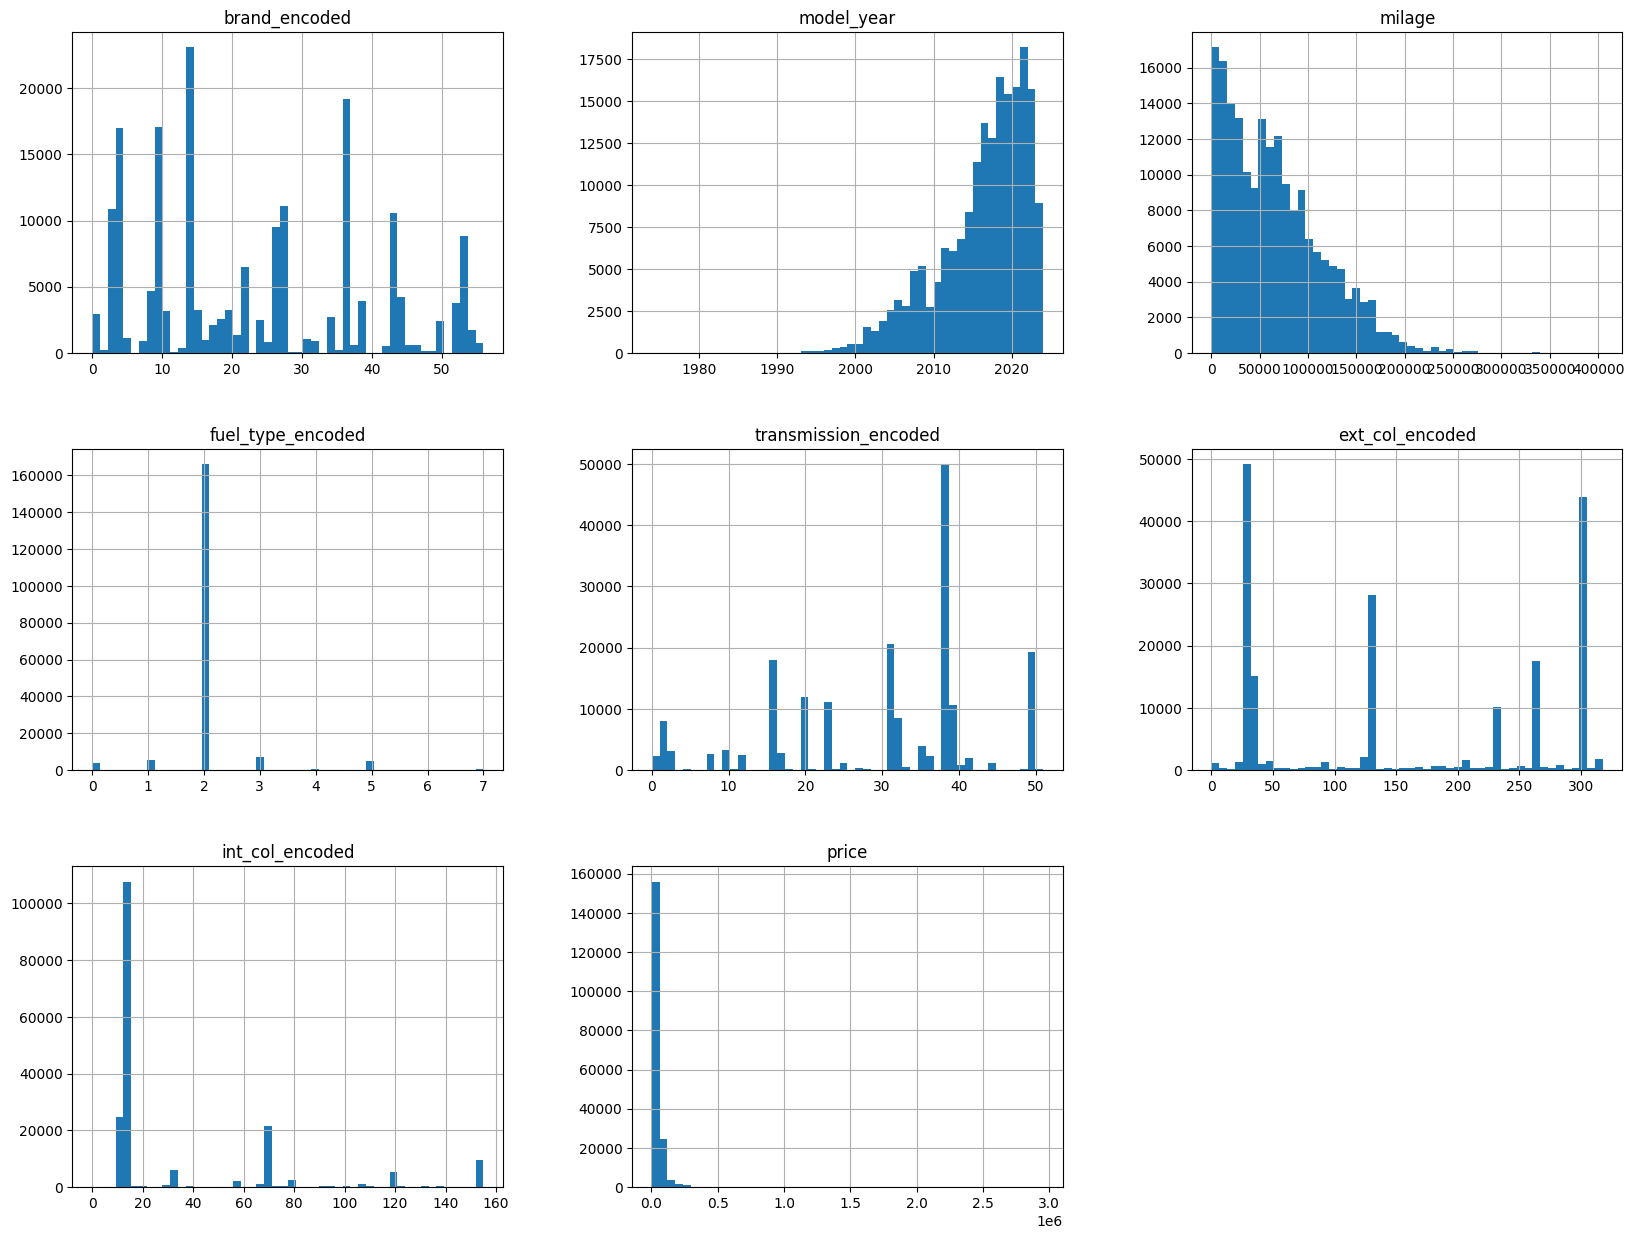

In [60]:
df.hist(bins=50, figsize=(20, 15))

In [61]:
from sklearn.impute import SimpleImputer


si = SimpleImputer(strategy='mean')
df = pd.DataFrame(si.fit_transform(df), columns=df.columns)

df_test = pd.DataFrame(si.fit_transform(df_test), columns=df_test.columns)

In [62]:
# from pandas_profiling import ProfileReport


# ProfileReport(df)

In [63]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [64]:
old_skew = df.skew()

In [65]:
def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(df))
    df.insert(0, f"{feature}_log", df_log)
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")


In [66]:
# logTrans(feature="price")

In [67]:
# df.drop('price_log', axis=1, inplace=True)
df.head()

,brand_encoded,model_year,milage,fuel_type_encoded,transmission_encoded,ext_col_encoded,int_col_encoded,price,clean_title_Yes,accidented
0,31.0,2007.0,213000.0,2.0,38.0,312.0,71.0,4200.0,1.0,0.0
1,28.0,2002.0,143250.0,2.0,38.0,263.0,10.0,4999.0,1.0,1.0
2,9.0,2002.0,136731.0,1.0,38.0,38.0,71.0,13900.0,1.0,0.0
3,16.0,2017.0,19500.0,2.0,49.0,29.0,14.0,45000.0,1.0,0.0
4,36.0,2021.0,7388.0,2.0,23.0,29.0,10.0,97500.0,1.0,0.0


In [68]:
from sklearn.model_selection import train_test_split

y = df['price']
x = df.drop('price', axis=1)
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, test_size = 0.8, random_state=0)

In [69]:
from sklearn.linear_model import Ridge


# lr = LinearRegression()
# lr = RandomForestRegressor()
# lr = xgb.XGBRegressor(objective="reg:linear", random_state=42)
# lr = lasso()

lr = Ridge()
lr = Ridge()
lr.fit(x, y)
y_pred = lr.predict(df_test)


In [70]:
df_t = pd.read_csv('test.csv')['id']
y_pred_df = pd.DataFrame(y_pred, columns=['price'])
y_pred_df.insert(0, 'id', df_t)
y_pred_df.to_csv('submission.csv', index=False)